In [1]:
# I used Faith's notebook for reference: https://github.com/fchikwekwe/IntroToMachineLearning/blob/master/Wholesale_Data_Assignment.ipynb.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance

from sklearn import preprocessing 
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix

In [3]:
df = pd.read_csv('datasets/wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# TASK: Read in wholesale_customers_data.csv from the datasets folder and store in a dataframe.

# Store the Channel column in a separate variable, and then drop the Channel and Region columns from the dataframe.

# Scale the data and use PCA to engineer new features (Principal Components).

# Print out the explained variance for each principal component.

In [4]:
channel = df['Channel']
channel

0      2
1      2
2      2
3      1
4      2
5      2
6      2
7      2
8      1
9      2
10     2
11     2
12     2
13     2
14     2
15     1
16     2
17     1
18     2
19     1
20     2
21     1
22     1
23     2
24     2
25     2
26     1
27     1
28     2
29     1
      ..
410    1
411    1
412    1
413    1
414    1
415    2
416    2
417    1
418    2
419    1
420    1
421    2
422    1
423    2
424    2
425    1
426    1
427    1
428    1
429    1
430    1
431    1
432    1
433    1
434    1
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [8]:
# Instantiating only the data that I need.
data = df.drop(['Channel', 'Region'], axis=1) # these are both labels

In [7]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [9]:
# scaling the data.
X_data_scaled = preprocessing.scale(data)
X_data_scaled

/Users/jamesmccrory/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

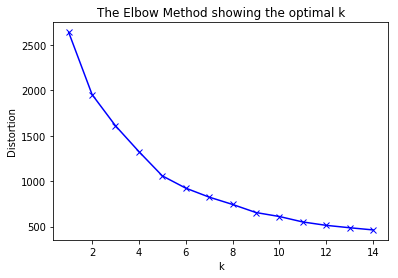

In [11]:
# array for storing the squared ditances. we square the distance so positive and negative values can both be used.
sum_of_squared_distances = []

# random K clusters
K = range(1,15)

# for k cluster in range K clusters
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X_data_scaled)
    sum_of_squared_distances.append(km.inertia_) # inertia_ : float an attribute of KMeans
                                                # "Sum of squared distances of samples to their closest cluster center."
    
# Looking for the optimal k-cluster
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


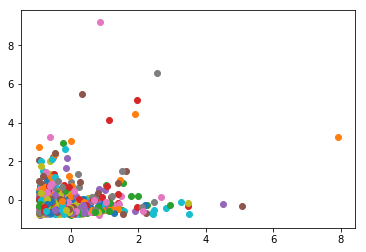

In [17]:
# I do not understand this...

# Faith said it was a failed attempt to model the clusters.

# print(len(X_data_scaled[0]))

for k, (i,j) in enumerate(zip(X_data_scaled[:, 0], X_data_scaled[:, 1])):
    plt.scatter(i, j)
    
plt.show()

In [27]:
ACTUAL_NUM_OF_CLUSTERS = channel.nunique()
print(ACTUAL_NUM_OF_CLUSTERS) # 2

# "Linear dimensionality reduction using Singular Value Decomposition of the data to project it
# to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD."
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_data_scaled)
km.fit(X_r)

# STEP 1: Instantiate our model with best guess as to n_clusters.
kmeans_model = KMeans(n_clusters=ACTUAL_NUM_OF_CLUSTERS)

# STEP 2: Fit our data to our model.
kmeans_model.fit(X_r) # PCA fitted data

# STEP 3: Check our model label types.
PCA_targets_pred = kmeans_model.labels_

# STEP 2: Fit our data to our model.
kmeans_model.fit(X_data_scaled) # scaled data

# STEP 3: Check our model label types.
# labels_ : "Labels of each point"
scaled_targets_pred = kmeans_model.labels_

# STEP 4: Run some predictions!
print(kmeans_model.predict([[13260, 1195, 4220, 6400, 500, 1790]])) # test point w/ true label 0

# STEP 5 (optional): Check the Cluster Centers.
print(kmeans_model.cluster_centers_)

2
[1]
[[-0.00689859 -0.19077015 -0.21063944 -0.00533955 -0.21799404 -0.07901651]
 [ 0.07982658  2.20748316  2.43739927  0.06178626  2.52250243  0.91433391]]


In [28]:
targets_true = np.array([item - 1 for item in channel]) # map to be same values as results
targets_true

error_counter = 0
for index, item in enumerate(PCA_targets_pred):
    if item != targets_true[index]:
        error_counter += 1

total_error = 100 * error_counter / len(PCA_targets_pred)
# this is kash's terrible hacky way of showing correct accuracy vs error
if total_error > 50:
    total_error = 100 - total_error
        

print("\nTOTAL ERROR IN PCA FITTED DATA CLUSTERING PREDICTION IS: {:.2f}%".format(total_error))
print("\nACCURACY OF PCA FITTED DATA CLUSTERING MODEL IS: {:.2f}%\n".format(100 - total_error))


TOTAL ERROR IN PCA FITTED DATA CLUSTERING PREDICTION IS: 22.95%

ACCURACY OF PCA FITTED DATA CLUSTERING MODEL IS: 77.05%



In [30]:
def cmat_(cm, labels=None):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="g", ax=ax)
    
    ax.set_title("Confusion Matrix on Scaled Data")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    
    if labels:
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)
    plt.show()

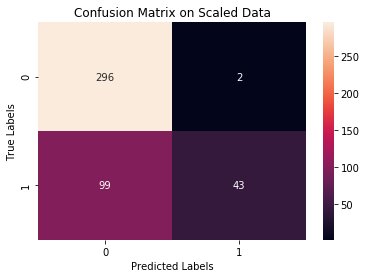

In [31]:
cmat_obj = confusion_matrix(targets_true, PCA_targets_pred)
cmat_(cmat_obj)